In [1]:
import numpy as np
from numpy import fft
import matplotlib.pylab as plt

from blusky.wavelets.wavelet_factories_2d import vanilla_gabor_2d, vanilla_morlet_2d

# Demo wavelet factories
Use the factory functions to produce sets of Morlet2D wavelets at different resolutions, and also generate Morlet2D wavelets with the definitions used in https://github.com/scatnet/scatnet.

In [2]:
def do_vis(wavelet, sample_rate=0.004):
    """
    Visualize the wavelet an it's spectrum.
    
    Parameters
    ----------
    wav - Array
        The wavelet.
    """    
    f1 = fft.fftshift(np.fft.fftn(wavelet))
    f2 = fft.fftshift(np.fft.fft(wavelet[wavelet.shape[0]//2,:]))
       
    freqz = fft.fftshift(np.fft.fftfreq(wavelet.shape[0], sample_rate))    
    
    fig, axs = plt.subplots(2,2,figsize=(20,10))   
    axs[0,0].imshow(wavelet.real)
    axs[0,0].set_title('Real Part')
    
    axs[0,1].imshow(wavelet.imag)
    axs[0,1].set_title('Imag Part')
    
    axs[1,0].imshow(np.abs(f1.T), extent=(freqz.min(), freqz.max(), freqz.min(), freqz.max()))
    axs[1,0].set_title('Fourier (Power)')
    
    axs[1,1].plot(freqz, np.abs(f2))
    axs[1,1].set_title('Fourier Cross-Section (Power)')
    
    plt.show()


# Filter bank - Morlet
Construct three wavelets with different resolutions. "j" is the "scale" used in the continuous wavelet transform.
As "j" increases, the center frequency shifts towards zero and the bandwidth shrinks. To construct the filter, bank, we would define some reference "scale" J, and j would take values 0, ..., J.

In [3]:
wav0 = vanilla_morlet_2d(0.001, sigma=1.0, j=0, crop=5.).kernel(0)
wav1 = vanilla_morlet_2d(0.001, sigma=1.0, j=1, crop=4.).kernel(0)
wav2 = vanilla_morlet_2d(0.001, sigma=1.0, j=2, crop=3.5).kernel(0)

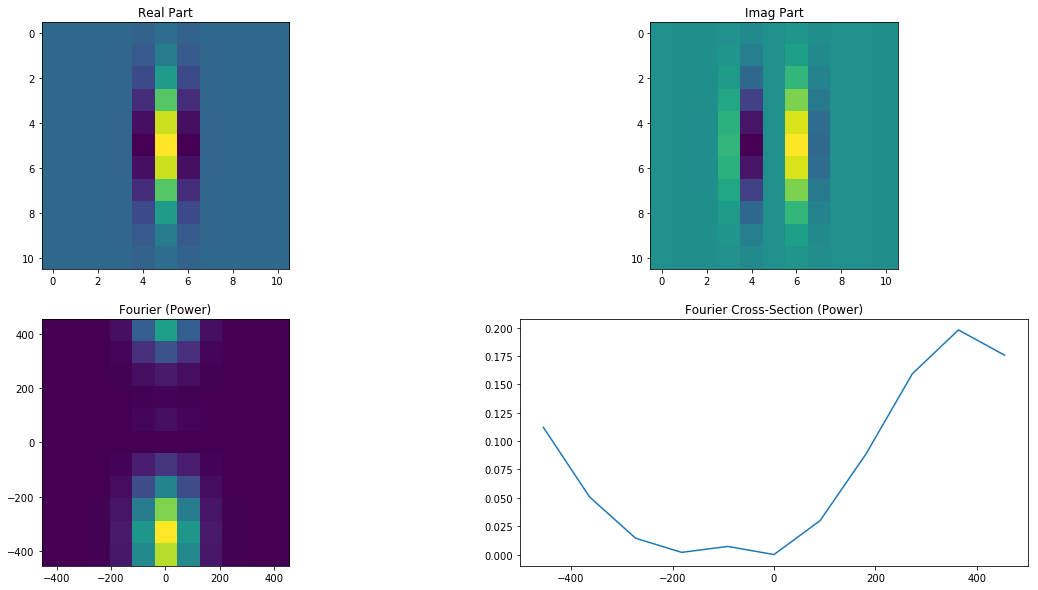

In [4]:
do_vis(wav0, sample_rate=0.001)

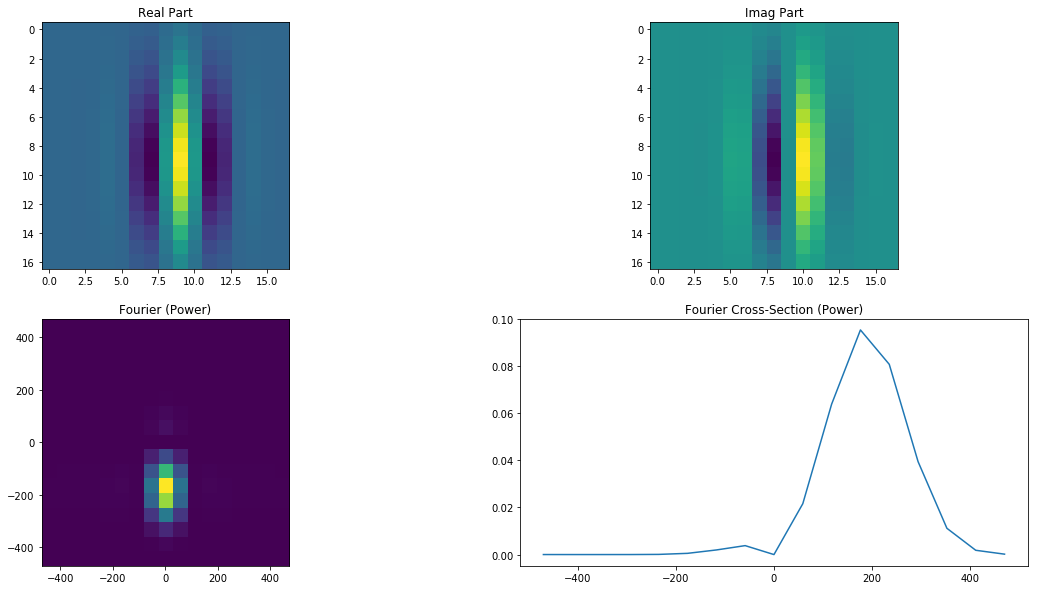

In [18]:
do_vis(wav1, sample_rate=0.001)

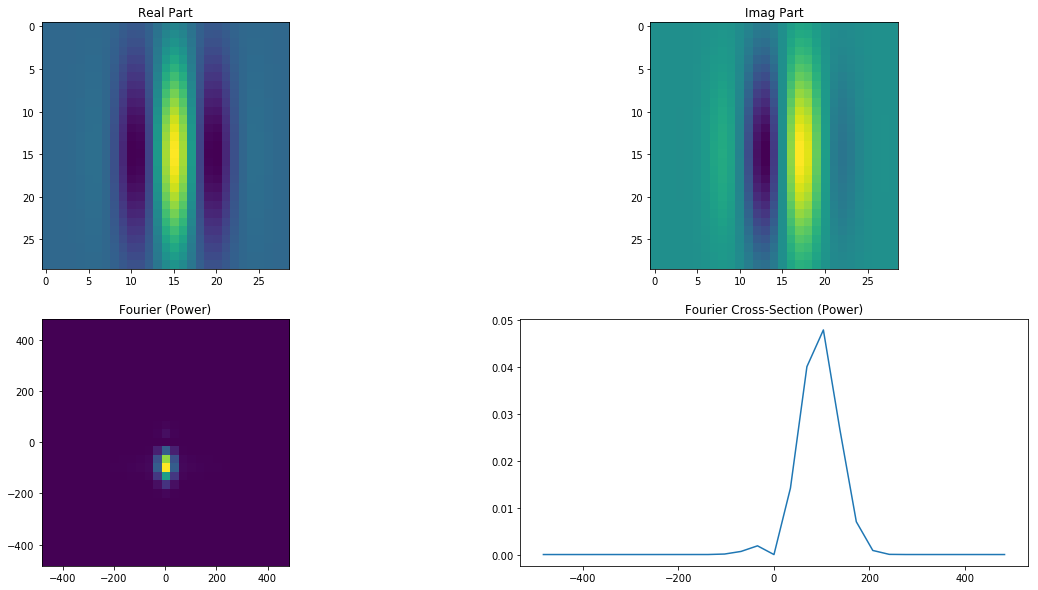

In [19]:
do_vis(wav2, sample_rate=0.001)

# Filter bank - Gabor
The scattering transform involves a sequence of convolutions last operation being an averaging. If filter bank is constructed from Morlet wavelets, then the gabor wavelet applies the averaging. The averaging is done using a wavelet at the coarsest scale, so if the filter bank consists of scales j = 0,1,2 then the averaging will be done at J=2.

In [9]:
import numpy as np
from numpy import fft
import matplotlib.pylab as plt

from blusky.wavelets.wavelet_factories_2d import vanilla_gabor_2d, vanilla_morlet_2d

wav0 = vanilla_gabor_2d(0.001, sigma=1.0, j=0, crop=7.).kernel(0)
wav1 = vanilla_gabor_2d(0.001, sigma=1.0, j=1, crop=5.).kernel(0)
wav2 = vanilla_gabor_2d(0.001, sigma=1.0, j=2, crop=5.).kernel(0)

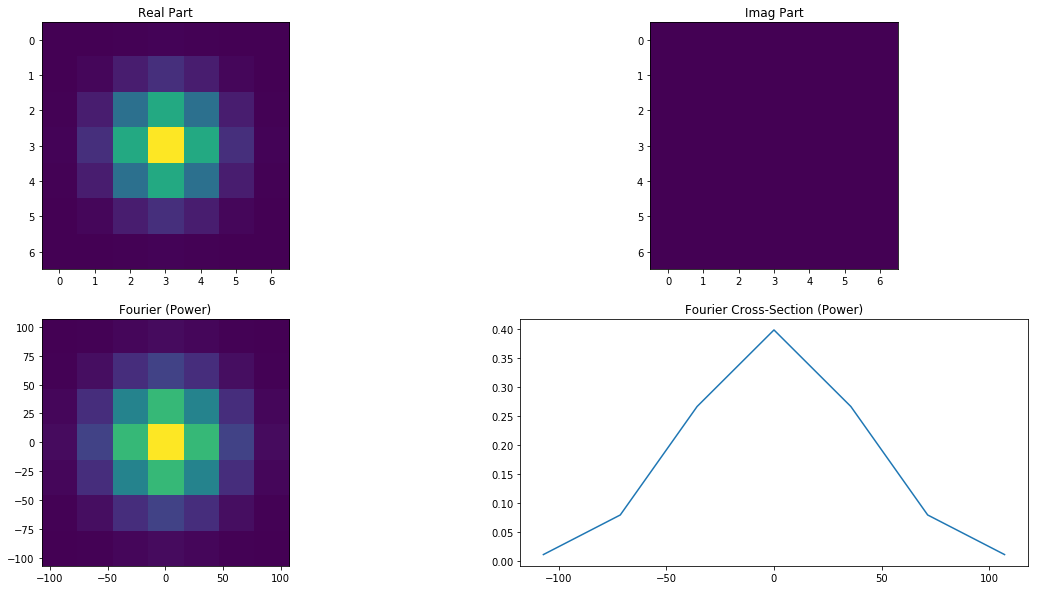

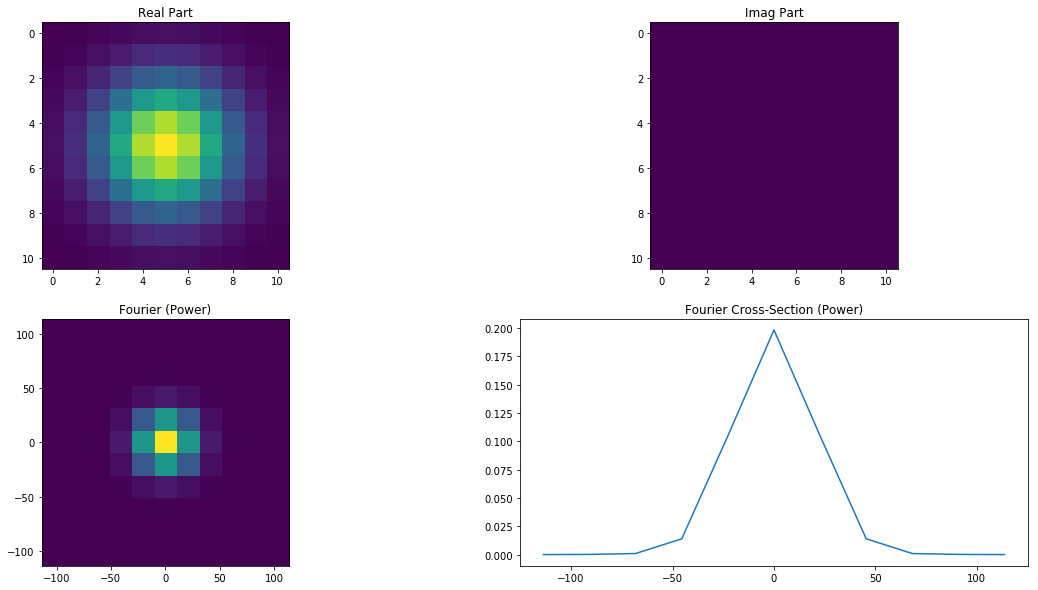

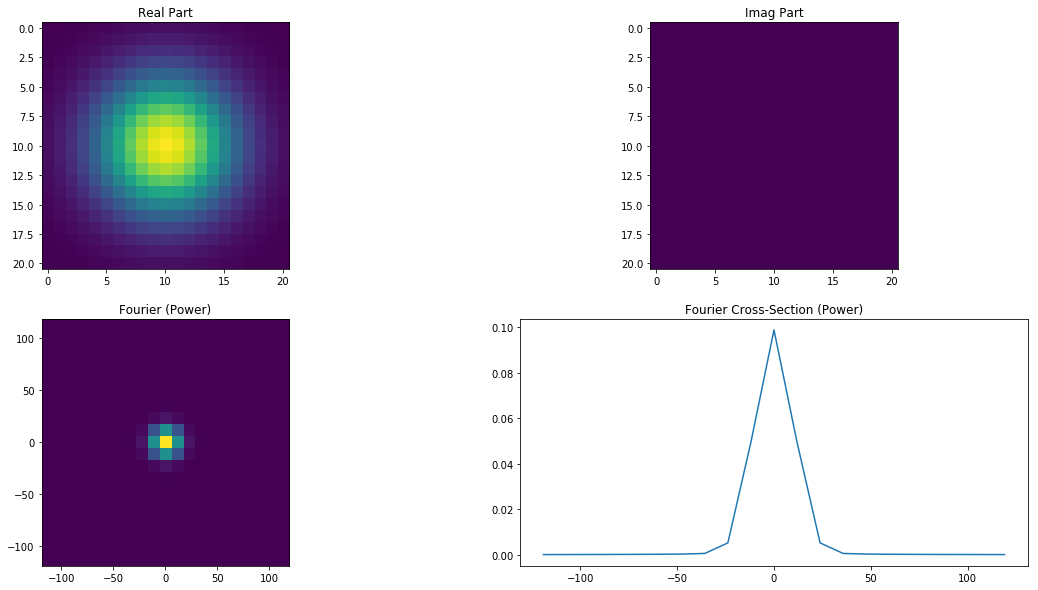

In [10]:
list(map(do_vis, [wav0, wav1, wav2]));